In [1]:
import numpy as np
import pandas as pd
import os
from keras.utils import set_random_seed

df = pd.read_csv('Data/WRF4.2.2_4km_calibrationFile_Eversource_Rainwind_294events_2023-11-17_CT 12.18.32 PM.csv')
df.head()

2024-08-29 16:08:34.994196: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 16:08:34.997501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 16:08:35.057054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 16:08:35.060371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 16:08:35.971880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

,eventCode,stormCode,eventLength,gridID,gridIDwrf,gIDwrf,latwrf,lonwrf,Territory,HGT,...,medWDIR10,WLANDMASK,WHGT,WLAI,LAI,medWDIR,difWDIR,outageLength,binaryts,countts
0,CT-2005100800,2005100800,48,g16974,g16974,16974,41.106861,-73.698273,CT,143.317993,...,72.641768,1,143.317993,2.913192,3.274934,72.641768,99.984551,48,0,0
1,CT-2005100800,2005100800,48,g16975,g16975,16975,41.070957,-73.701202,CT,113.597603,...,68.455052,1,113.597603,1.000000,3.307087,68.455052,101.489599,48,0,0
2,CT-2005100800,2005100800,48,g16976,g16976,16976,41.035046,-73.704132,CT,80.900375,...,65.798428,1,80.900375,1.000000,3.307087,65.798428,89.999149,48,0,0
3,CT-2005100800,2005100800,48,g17156,g17156,17156,41.140549,-73.647644,CT,150.076904,...,74.041407,1,150.076904,2.925068,3.274934,74.041407,-253.901195,48,1,1
4,CT-2005100800,2005100800,48,g17157,g17157,17157,41.104641,-73.650635,CT,123.888351,...,74.038184,1,123.888351,2.947943,3.274934,74.038184,100.359308,48,1,1


In [2]:
df = df.iloc[:236350, :]
event_codes = df["eventCode"]
group_labels = np.zeros(len(df), dtype=int)

current_label = 0
previous_code = None

for i, code in enumerate(event_codes):
    if code != previous_code:
        current_label += 1
        previous_code = code
    group_labels[i] = current_label

unique_codes, unique_indices = np.unique(event_codes, return_index=True)
for code, index in zip(unique_codes, unique_indices):
    print(f"Group Label: {group_labels[index]}, Event Code: {code}")

df["groupLabel"] = group_labels

Group Label: 1, Event Code: CT-2005100800
Group Label: 2, Event Code: CT-2005101512
Group Label: 3, Event Code: CT-2005102418
Group Label: 4, Event Code: CT-2006011706
Group Label: 5, Event Code: CT-2006021700
Group Label: 6, Event Code: CT-2006060700
Group Label: 7, Event Code: CT-2006090118
Group Label: 8, Event Code: CT-2006102000
Group Label: 9, Event Code: CT-2006102800
Group Label: 10, Event Code: CT-2007041506
Group Label: 11, Event Code: CT-2008030800
Group Label: 12, Event Code: CT-2008032100
Group Label: 13, Event Code: CT-2008090600
Group Label: 14, Event Code: CT-2008102506
Group Label: 15, Event Code: CT-2008121100
Group Label: 16, Event Code: CT-2008122406
Group Label: 17, Event Code: CT-2008123006
Group Label: 18, Event Code: CT-2009050906
Group Label: 19, Event Code: CT-2009100700
Group Label: 20, Event Code: CT-2009112800
Group Label: 21, Event Code: CT-2009120300
Group Label: 22, Event Code: CT-2010012500
Group Label: 23, Event Code: CT-2010031300
Group Label: 24, Eve

In [7]:
df.head()

,eventCode,stormCode,eventLength,gridID,gridIDwrf,gIDwrf,latwrf,lonwrf,Territory,HGT,...,WLANDMASK,WHGT,WLAI,LAI,medWDIR,difWDIR,outageLength,binaryts,countts,groupLabel
0,CT-2005100800,2005100800,48,g16974,g16974,16974,41.106861,-73.698273,CT,143.317993,...,1,143.317993,2.913192,3.274934,72.641768,99.984551,48,0,0,1
1,CT-2005100800,2005100800,48,g16975,g16975,16975,41.070957,-73.701202,CT,113.597603,...,1,113.597603,1.000000,3.307087,68.455052,101.489599,48,0,0,1
2,CT-2005100800,2005100800,48,g16976,g16976,16976,41.035046,-73.704132,CT,80.900375,...,1,80.900375,1.000000,3.307087,65.798428,89.999149,48,0,0,1
3,CT-2005100800,2005100800,48,g17156,g17156,17156,41.140549,-73.647644,CT,150.076904,...,1,150.076904,2.925068,3.274934,74.041407,-253.901195,48,1,1,1
4,CT-2005100800,2005100800,48,g17157,g17157,17157,41.104641,-73.650635,CT,123.888351,...,1,123.888351,2.947943,3.274934,74.038184,100.359308,48,1,1,1


In [3]:
# constant features
constant_df = df.iloc[:, :97]
constant_df["countts"] = df["countts"]
constant_df.head()

,eventCode,stormCode,eventLength,gridID,gridIDwrf,gIDwrf,latwrf,lonwrf,Territory,HGT,...,prec43,prec52,prec71,prec81,prec82,prec90,prec95,elvDiff,prec42,countts
0,CT-2005100800,2005100800,48,g16974,g16974,16974,41.106861,-73.698273,CT,143.317993,...,0.121396,0.001517,0.012747,0.016085,0.000000,0.028832,0.000000,12.877557,0.015478,0
1,CT-2005100800,2005100800,48,g16975,g16975,16975,41.070957,-73.701202,CT,113.597603,...,0.137568,0.001815,0.002904,0.011978,0.000363,0.002178,0.000363,-1.215946,0.008348,0
2,CT-2005100800,2005100800,48,g16976,g16976,16976,41.035046,-73.704132,CT,80.900375,...,0.024931,0.000000,0.005540,0.000000,0.000000,0.011080,0.000000,-10.089323,0.000000,0
3,CT-2005100800,2005100800,48,g17156,g17156,17156,41.140549,-73.647644,CT,150.076904,...,0.156550,0.002130,0.018104,0.021832,0.000000,0.023429,0.000000,5.180551,0.007455,1
4,CT-2005100800,2005100800,48,g17157,g17157,17157,41.104641,-73.650635,CT,123.888351,...,0.207087,0.000890,0.015135,0.018519,0.000712,0.033832,0.000712,2.104055,0.021189,1


In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler

In [5]:
# select 20 constant features based on pearson correlation value, and then get the costant adjacency matrix
# there is only one constant matrix for all the events

y = df["countts"].copy()
X_constant = df[["land21", "fuseCount", "landTotal", "ohLength", "poleCount",
        "reclrCount", "land22", "land24", "land23", "land43", "latwrf",
        "avgHardSDI", "avgHardBA", "soilDepth", "stdHardBA", "hydNo",
        "prec81", "avgTPA", "stdHardSDI", "avgSDI"
     ]]

X_constant = X_constant.fillna(0)
scaler = StandardScaler()
X_constant = scaler.fit_transform(X_constant)

constant_reshaped_data = X_constant.reshape(290, 815, 20)
constant_reshaped_data = constant_reshaped_data[0,:,:]
print(constant_reshaped_data.shape)

(815, 20)


In [6]:
def mean_cosine_similarity(arr1, arr2):
    norm1 = np.linalg.norm(arr1)
    norm2 = np.linalg.norm(arr2)
    arr1 = arr1 / norm1
    arr2 = arr2 / norm2
    similarities = np.sum(arr1 * arr2)
    return np.mean(similarities)

In [8]:
n_nodes = constant_reshaped_data.shape[0]
constant_adjacency_matrix = np.zeros((n_nodes, n_nodes), dtype=int)

similarity_matrix = np.zeros((n_nodes, n_nodes))
for i in range(n_nodes):
    for j in range(i + 1, n_nodes):
        similarity = mean_cosine_similarity(constant_reshaped_data[i], constant_reshaped_data[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

nearest_neighbors = np.argsort(-similarity_matrix, axis=1)[:, 1:9]   # number of neighbors, hyperparameter tuning

eighth_neighbors = np.sort(similarity_matrix, axis=1)[:, -8]  # Get the 8th largest value
average_eighth_neighbor_value = np.mean(eighth_neighbors)
threshold = average_eighth_neighbor_value

nearest_matrix = np.zeros((n_nodes, n_nodes), dtype=int)
for k in range(n_nodes):
    nearest_matrix[k, nearest_neighbors[k]] = 1
constant_adjacency_matrix[(similarity_matrix > threshold) & (nearest_matrix == 1)] = 1

np.save("/home/xus23004/Project/OPM/Results/constant_adjacency_matrix.npy", constant_adjacency_matrix)

In [ ]:
constant_adjacency_matrix = np.load("/content/drive/MyDrive/constant_adjacent.npy")

In [ ]:
# dynamic features:

In [13]:
# select 30 dynamic features based on pearson correlation value, and then get the dynamic adjacency matrix
# each event has its own dynamic adjacency matrix

X_dynamic = df[["binaryts", "coggt27", "ggt27", "ggt22", "coggt22",
        "stdW850", "maxGUST", "peakW850", "maxW850", "peakGUST", "avgAFWA_CAPE",
        "avgSSRUN", "peakAFWA_LLWS", "peakSSRUN", "coggt17", "maxSSRUN", "stdAFWA_RAIN",
        "maxAFWA_CAPE", "stdAFWA_TOTPRECIP", "avgAFWA_RAIN", "ggt17", "avgAFWA_TOTPRECIP",
        "stdSMOIS4", "stdGUST", "stdSSRUN", "stdTDIF", "peakPSFC", "minPSFC",
        "peakAFWA_MSLP", "minAFWA_MSLP"]]


X_dynamic = X_dynamic.fillna(0)
scaler = StandardScaler()
X_dynamic = scaler.fit_transform(X_dynamic)

dynamic_reshaped_data = X_dynamic.reshape(290, 815, 30)
print(dynamic_reshaped_data.shape)

(290, 815, 30)


In [15]:
n_nodes = dynamic_reshaped_data.shape[1]
events = dynamic_reshaped_data.shape[0]
dynamic_adjacency_matrix = np.zeros((events, n_nodes, n_nodes), dtype=int)

for event in range(events):
    print(event)
    similarity_matrix = np.zeros((n_nodes, n_nodes))
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            similarity = mean_cosine_similarity(dynamic_reshaped_data[event, i], dynamic_reshaped_data[event, j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

    nearest_neighbors = np.argsort(-similarity_matrix, axis=1)[:, 1:9]

    eighth_neighbors = np.sort(similarity_matrix, axis=1)[:, -8]  # Get the 8th largest value
    average_eighth_neighbor_value = np.mean(eighth_neighbors)
    threshold = average_eighth_neighbor_value

    nearest_matrix = np.zeros((n_nodes, n_nodes), dtype=int)
    for k in range(n_nodes):
        nearest_matrix[k, nearest_neighbors[k]] = 1
    dynamic_adjacency_matrix[event][(similarity_matrix > threshold) & (nearest_matrix == 1)] = 1

np.save("/home/xus23004/Project/OPM/Results/dynamic_adjacency_matrix.npy", dynamic_adjacency_matrix)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
dynamic_adjacency_matrix = np.load("/home/xus23004/Project/OPM/Results/dynamic_adjacency_matrix.npy")

In [11]:
# combine the constant and dynamic matrix, and obtain the final adjacency matrix for each event

n_nodes = 815
events = 290

In [12]:
adjacency_matrix = np.zeros((events, n_nodes, n_nodes), dtype=int)

for event in range(events):
    adjacency_matrix[event] = 0.3897679 * constant_adjacency_matrix + 0.6102321 * dynamic_adjacency_matrix[event]

# There are different combination methods, or even modify the network to combine constant and dynamic information. Still working on this.

In [14]:
np.save("/home/xus23004/Project/OPM/Results/cosntantdynamicMix_adjacency_matrix.npy", adjacency_matrix)

In [15]:
adjacency_matrix = np.load("/home/xus23004/Project/OPM/Results/cosntantdynamicMix_adjacency_matrix.npy")

In [16]:
# "counts" value for each event

y = df["countts"].copy()
unique_test_groups = np.unique(group_labels)
actual_counts = np.zeros(len(unique_test_groups)+1)

for group in unique_test_groups:
    group_actual = y[group_labels == group]
    actual_counts[group] = np.int32(np.sum(group_actual))

print(actual_counts)

[    0.   536.   623.   741.  2653.   313.   490.  1323.   484.   815.
  1112.   674.   205.   694.  1269.   656.   137.   460.   122.   932.
   328.   527.   794.  3524.   582.   773.   566.  1215.   880. 16022.
   756.   676.  1598. 15829.  1971.    65.   208.   241.   152.   163.
   217.   107.   327.   111.   349.   153.   187.   179.   390.   652.
   124.    79.   186.   184.   510.    85.   256.   159.   113.   196.
    62.   113.    44.   129.   480.    69.    64.   109.   115.   278.
   101.   302.    94.    74.    66.   134.    62.    74.   121.   110.
    81.    68.    51.    94.    71.   780.    38.    65.    32.    57.
    97.    50.    89.   140.   115.    79.   133.   161.   133.    92.
   125.   132.    68.   119.    61.   127.   309.   137.   226.    60.
   494.  4558.    89.   171.   103.   336.    74.    92.    80.   139.
   167.    64.    75.    69.   202.    46.  2935.   180.   204.   104.
   310.   318.   178.   404.   190.   112.   100.   421.    67.   489.
    75

In [17]:
# classify events into different groups based on "counts", this part may be not used in the following code

pd.set_option('display.max_rows', None)
bin_edges = [0, 300, 750, 5000, float('inf')]
bin_labels = [0, 1, 2, 3]

group_array = pd.cut(actual_counts, bins=bin_edges, labels=bin_labels)
print(group_array)
group_series = pd.Series(group_array)

group_counts = group_series.value_counts()
print(group_counts)

[NaN, 1, 1, 1, 2, ..., 0, 0, 0, 0, 1]
Length: 291
Categories (4, int64): [0 < 1 < 2 < 3]
0    208
1     44
2     35
3      3
Name: count, dtype: int64


In [18]:
# All selected 50 features, and obtained adjacency matrix, then do GCN


# y = df["countts"].copy()
X = df[["land21", "fuseCount", "landTotal", "ohLength", "poleCount",
        "reclrCount", "land22", "land24", "land23", "land43", "latwrf",
        "avgHardSDI", "avgHardBA", "soilDepth", "stdHardBA", "hydNo",
        "prec81", "avgTPA", "stdHardSDI", "avgSDI", "binaryts", "coggt27", "ggt27", "ggt22", "coggt22",
        "stdW850", "maxGUST", "peakW850", "maxW850", "peakGUST", "avgAFWA_CAPE",
        "avgSSRUN", "peakAFWA_LLWS", "peakSSRUN", "coggt17", "maxSSRUN", "stdAFWA_RAIN",
        "maxAFWA_CAPE", "stdAFWA_TOTPRECIP", "avgAFWA_RAIN", "ggt17", "avgAFWA_TOTPRECIP",
        "stdSMOIS4", "stdGUST", "stdSSRUN", "stdTDIF", "peakPSFC", "minPSFC",
        "peakAFWA_MSLP", "minAFWA_MSLP"]]


X = X.fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
import torch.nn as nn

class GCNForecast(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNForecast, self).__init__()
        self.conv1_static = GCNConv(in_channels, hidden_channels)
        self.conv1_dynamic = GCNConv(in_channels, hidden_channels)
        self.conv2_static = GCNConv(hidden_channels, out_channels)
        self.conv2_dynamic = GCNConv(hidden_channels, out_channels)
        self.fc1 = nn.Linear(2*out_channels, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x, edge_index_static, edge_index_dynamic):
        batch_size, num_nodes, _ = x.size()
        x = x.view(batch_size * num_nodes, -1)  # Reshape to (batch_size * num_nodes, in_channels)
        x_static = self.conv1_static(x, edge_index_static)
        x_dynamic = self.conv1_dynamic(x, edge_index_dynamic)

        x_static = F.relu(x_static)
        x_dynamic = F.relu(x_dynamic)

        x_static = F.dropout(x_static, training=self.training)
        x_dynamic = F.dropout(x_dynamic, training=self.training)

        x_static = self.conv2_static(x_static, edge_index_static)
        x_dynamic = self.conv2_dynamic(x_dynamic, edge_index_dynamic)

        x_static = F.relu(x_static)
        x_dynamic = F.relu(x_dynamic)

        x = torch.cat((x_static, x_dynamic), dim=1).mean(dim=0)

        embedding = x

        x = x.view(batch_size, -1)  # Reshape back to (batch_size, num_nodes, out_channels)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x, embedding

In [ ]:
print(torch.tensor([5]))

tensor([5])


In [20]:
# a = torch.tensor([[0.7, 0.1, 0.2, 0]])
# b = torch.tensor([0])
# print(a.shape)
# print(b.shape)
# print(criterion(a, b))

torch.Size([1, 4])
torch.Size([1])


NameError: name 'criterion' is not defined

In [32]:
def load_data(feature_matrix, labels):
    # edge_index = torch.nonzero(adj_matrix).t().contiguous()
    x = torch.tensor(feature_matrix, dtype=torch.float)
    # y = torch.tensor(labels, dtype=torch.float).view(-1, 815, 1)  # Reshape labels to (batch_size, num_nodes, 1)
    y = torch.tensor(labels, dtype=torch.float)    # Reshape labels to (batch_size, num_nodes, 1)
    return x, y


def train(model, x, edge_index_static, edge_index_dynamic, y, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out,_ = model(x, edge_index_static, edge_index_dynamic)
    # print("out", out.shape)
    # print("y", y.shape)
    loss = criterion(out, y)
    loss.backward()           ###########是在每一次都做backward，还是都遍历一次再做backward
    optimizer.step()
    scheduler.step()
    return loss.item()


def test(model, x, edge_index_static, edge_index_dynamic, y, criterion):
    model.eval()

    with torch.no_grad():
      out,embedding = model(x, edge_index_static, edge_index_dynamic)
      print(out.shape)
      loss = criterion(out, y)
    return loss.item(), out.argmax(), embedding.detach()

In [ ]:
# a = torch.tensor([[0.1, 0.7, 0.2, 0]])
# b = np.zeros(2)
# print(a.argmax())
# b[0] = a.argmax()
# print(b)


tensor(1)
[1. 0.]


In [34]:
# do leave one out based on events

from sklearn.model_selection import GroupKFold

# adjacency_matrix = torch.tensor(adjacency_matrix, dtype=torch.float)
constant_adjacency_matrix = torch.tensor(constant_adjacency_matrix, dtype=torch.float)
dynamic_adjacency_matrix = torch.tensor(dynamic_adjacency_matrix, dtype=torch.float)

edge_index_static = torch.nonzero(constant_adjacency_matrix).t().contiguous()


feature_matrix = X            # feature matrix (290x815 , 50)
y = group_array[1:]
labels = y                    # node labels for forecasting (290x815, )
x, y = load_data(feature_matrix, labels)


gkf = GroupKFold(n_splits=290)
predictions = np.zeros(290)
embeddings = np.zeros((len(df), 16))


for fold, (train_index, test_index) in enumerate(gkf.split(df, groups=df["groupLabel"])):
    print(f"Fold {fold + 1}:")
    print(f"Test Index: {test_index[0]}")

    train_x, test_x = x[train_index].view(-1, 815, 50).to(device), x[test_index].view(-1, 815, 50).to(device)

    train_y = []
    test_y = []
    for idx in range(0, len(train_index), 815):
        event = train_index[idx] // 815
        train_y.append(y[event].int())
    for idx in range(0, len(test_index), 815):
        event = test_index[idx] // 815
        test_y.append(y[event].int())

    # print(train_y)
    # print(test_y)
    # print(torch.tensor(train_y))


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_y, test_y = torch.tensor(train_y, dtype=torch.int).to(device), torch.tensor(test_y, dtype=torch.int).to(device)

    idx_train = train_index.reshape(-1,815)  # (289, 815)
    idx_test = test_index.reshape(-1,815)    # (1, 815)

    model = GCNForecast(in_channels=50, hidden_channels=32, out_channels=16).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    criterion = nn.CrossEntropyLoss()  # Use Huber loss with delta=0.22, hyperpameter tuning

    for epoch in range(10):
        loss_total = 0.0

        for event in range(289):
            idx_start = idx_train[event][0]
            idx_event = idx_start // 815

            edge_index_dynamic = torch.nonzero(dynamic_adjacency_matrix[idx_event]).t().contiguous()

            # print("train_y:",torch.tensor([train_y[event]]).shape)
            loss = train(model, train_x[event, :, :].view(1, 815, 50), edge_index_static.to(device), edge_index_dynamic.to(device), torch.tensor([train_y[event]]).long().to(device), optimizer, criterion)
            loss_total += loss
        # print(f"Epoch {epoch+1}, Loss: {loss_total:.4f}")

    #print("test_x size:", test_x.shape)
    #print("test_y size:", test_y.shape)

    test_event = idx_test[0][0] // 815
    edge_index_dynamic_test = torch.nonzero(dynamic_adjacency_matrix[test_event]).t().contiguous()
    test_loss, out, embedding = test(model, test_x, edge_index_static.to(device), edge_index_dynamic_test.to(device), torch.tensor(test_y).long().to(device), criterion)
    print(f"Test Loss: {test_loss:.4f}")
    print("out:", out)
    predictions[test_event] = out
    # embeddings[test_index] = embedding

np.save("/home/xus23004/Project/OPM/Results/predictions_GCN_classification.npy", predictions)

/tmp/ipykernel_2716010/3501132699.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  constant_adjacency_matrix = torch.tensor(constant_adjacency_matrix, dtype=torch.float)
/tmp/ipykernel_2716010/3501132699.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dynamic_adjacency_matrix = torch.tensor(dynamic_adjacency_matrix, dtype=torch.float)


Fold 1:
Test Index: 235535


/tmp/ipykernel_2716010/3501132699.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss, out, embedding = test(model, test_x, edge_index_static.to(device), edge_index_dynamic_test.to(device), torch.tensor(test_y).long().to(device), criterion)


torch.Size([1, 4])
Test Loss: 0.5180
out: tensor(1, device='cuda:0')
Fold 2:
Test Index: 58680
torch.Size([1, 4])
Test Loss: 2.2057
out: tensor(1, device='cuda:0')
Fold 3:
Test Index: 74980
torch.Size([1, 4])
Test Loss: 2.6882
out: tensor(1, device='cuda:0')
Fold 4:
Test Index: 75795
torch.Size([1, 4])
Test Loss: 2.6923
out: tensor(1, device='cuda:0')
Fold 5:
Test Index: 76610
torch.Size([1, 4])
Test Loss: 2.6961
out: tensor(1, device='cuda:0')
Fold 6:
Test Index: 77425
torch.Size([1, 4])
Test Loss: 2.3925
out: tensor(1, device='cuda:0')
Fold 7:
Test Index: 78240
torch.Size([1, 4])
Test Loss: 2.6848
out: tensor(1, device='cuda:0')
Fold 8:
Test Index: 79055
torch.Size([1, 4])
Test Loss: 2.5173
out: tensor(1, device='cuda:0')
Fold 9:
Test Index: 79870
torch.Size([1, 4])
Test Loss: 2.1187
out: tensor(1, device='cuda:0')
Fold 10:
Test Index: 80685
torch.Size([1, 4])
Test Loss: 1.7994
out: tensor(1, device='cuda:0')
Fold 11:
Test Index: 81500
torch.Size([1, 4])
Test Loss: 3.0233
out: tensor

In [ ]:
# evaluate the results

In [ ]:
predictions = np.load("/content/drive/MyDrive/predictions_GCN_classification.npy")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)
count_results = pd.DataFrame({'Predicted': np.int32(predictions), 'Actual': group_array[1:]})
count_results = count_results
print(count_results)

     Predicted Actual
0            1      1
1            1      1
2            1      1
3            1      2
4            2      1
5            1      1
6            1      2
7            1      1
8            1      2
9            1      2
10           1      1
11           1      0
12           1      1
13           1      2
14           1      1
15           1      0
16           1      1
17           1      0
18           1      2
19           1      1
20           1      1
21           1      2
22           1      2
23           1      1
24           1      2
25           1      1
26           1      2
27           1      2
28           1      3
29           1      2
30           1      1
31           1      2
32           1      3
33           1      2
34           1      0
35           2      0
36           1      0
37           1      0
38           1      0
39           1      0
40           1      0
41           1      1
42           1      0
43           2      1
44        

In [ ]:
def mape(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

unique_test_groups = np.unique(group_labels)
prediction_counts = np.zeros(len(unique_test_groups)+1)
actual_counts = np.zeros(len(unique_test_groups)+1)
y = df["countts"].copy()

for group in unique_test_groups:
    group_predictions = predictions[group_labels == group]
    group_actual = y[group_labels == group]
    prediction_counts[group] = np.int32(np.sum(group_predictions))
    actual_counts[group] = np.int32(np.sum(group_actual))

pd.set_option('display.max_rows', None)
count_results = pd.DataFrame({'Predicted': prediction_counts, 'Actual': actual_counts})
count_results = count_results[1:]
print(count_results)

     Predicted   Actual
1        325.0    536.0
2        300.0    623.0
3        318.0    741.0
4        332.0   2653.0
5        247.0    313.0
6        199.0    490.0
7        163.0   1323.0
8        204.0    484.0
9        502.0    815.0
10       418.0   1112.0
11       293.0    674.0
12       172.0    205.0
13       639.0    694.0
14       278.0   1269.0
15       258.0    656.0
16       344.0    137.0
17       240.0    460.0
18       164.0    122.0
19       179.0    932.0
20       233.0    328.0
21       179.0    527.0
22       480.0    794.0
23       423.0   3524.0
24       188.0    582.0
25       206.0    773.0
26       472.0    566.0
27       375.0   1215.0
28       447.0    880.0
29      1540.0  16022.0
30       230.0    756.0
31       177.0    676.0
32       311.0   1598.0
33       292.0  15829.0
34       346.0   1971.0
35        32.0     65.0
36       103.0    208.0
37       201.0    241.0
38       234.0    152.0
39       154.0    163.0
40       274.0    217.0
41       163.0  

In [ ]:
print("MAPE:", mape(actual_counts[1:], prediction_counts[1:]))
print("R2:", r2_score(actual_counts[1:], prediction_counts[1:]))

MAPE: 72.34745472501699
R2: 0.03778431974550889


<ipython-input-37-ad891f454cbc>:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(min_value, max_value)
<ipython-input-37-ad891f454cbc>:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(min_value, max_value)


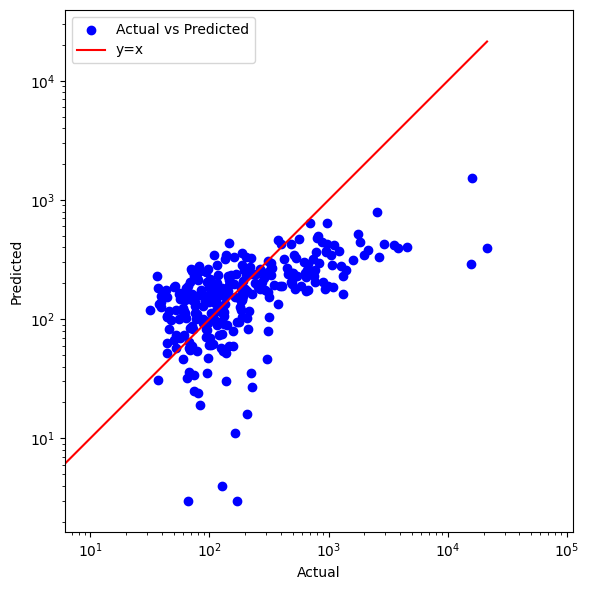

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(actual_counts, prediction_counts, color='blue', label='Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

ax.set_xscale('log')
ax.set_yscale('log')

# Set the x-axis and y-axis limits to be equal
min_value = min(np.min(actual_counts), np.min(prediction_counts))
max_value = max(np.max(actual_counts), np.max(prediction_counts))
ax.set_xlim(min_value, max_value)
ax.set_ylim(min_value, max_value)
# ax.set_aspect('equal')
plt.axis('equal')

# Draw a line representing y=x
ax.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', label='y=x')

ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
ae = np.abs(prediction_counts[1:] - actual_counts[1:])
q25 = np.percentile(ae, 25)
q50 = np.percentile(ae, 50)
q75 = np.percentile(ae, 75)
print("AE:", q25, q50, q75)

AE: 39.25 82.0 190.25


In [ ]:
ape = np.abs(prediction_counts[1:] - actual_counts[1:])/actual_counts[1:] * 100
q25 = np.percentile(ape, 25)
q50 = np.percentile(ape, 50)
q75 = np.percentile(ape, 75)
print("APE:", q25, q50, q75)

APE: 26.643418089955517 53.98981324278438 85.42191936399773


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true_mean = np.mean(actual_counts)

y_true_centered = actual_counts - y_true_mean
y_pred_centered = prediction_counts - y_true_mean

crmse = np.sqrt(mean_squared_error(y_true_centered, y_pred_centered))

print("CRMSE:", crmse)

CRMSE: 1828.3616800266


In [ ]:
# If we remove the three extreme events, the results of R2 and CRMSE would be much better

In [ ]:
new_prediction_counts = prediction_counts

In [ ]:
print(actual_counts[29])
print(new_prediction_counts[29])

print(actual_counts[33])
print(actual_counts[209])

16022.0
1540.0
15829.0
21377.0


In [ ]:
new_prediction_counts[29] = 16022
new_prediction_counts[33] = 15829
new_prediction_counts[209] = 21377

In [ ]:
print("MAPE:", mape(actual_counts[1:], new_prediction_counts[1:]))
print("R2:", r2_score(actual_counts[1:], new_prediction_counts[1:]))

MAPE: 71.35884879231948
R2: 0.9194698811188228


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true_mean = np.mean(actual_counts)

y_true_centered = actual_counts - y_true_mean
y_pred_centered = new_prediction_counts - y_true_mean

crmse = np.sqrt(mean_squared_error(y_true_centered, y_pred_centered))

print("CRMSE:", crmse)

CRMSE: 528.9383616055909


In [ ]:
ae = np.abs(new_prediction_counts[1:] - actual_counts[1:])
q25 = np.percentile(ae, 25)
q50 = np.percentile(ae, 50)
q75 = np.percentile(ae, 75)
print("AE:", q25, q50, q75)

AE: 38.0 77.5 181.0


In [ ]:
ape = np.abs(new_prediction_counts[1:] - actual_counts[1:])/actual_counts[1:] * 100
q25 = np.percentile(ape, 25)
q50 = np.percentile(ape, 50)
q75 = np.percentile(ape, 75)
print("APE:", q25, q50, q75)

APE: 24.91788410628493 53.15181518151816 83.98168394091753
